# TODO
jak na razie tylko EDA
trzeba wybrać około 30 kolumn, które będą najbardziej skorelowane z targetem.kolumna default
potem trzeba zrobić plot tych 30 kolumn i zobaczyć jak bardzo ich rozkład się zmienia w zależności od kolumny default
idpitd


# Projekt 1

### Import modułów i danych

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
pd.options.mode.copy_on_write = True
plt.style.use('seaborn-v0_8')
df = pd.read_csv("zbior_10.csv")
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)
X_train = df_train.drop("default", axis=1)
Y_train = df_train["default"]


## EDA

In [47]:
df.dtypes

szczegolnaFormaPrawna_Symbol                          int64
formaWlasnosci_Symbol                                 int64
pkdKod                                                int64
wsk_liczba_dni_istnienia                              int64
Aktywa                                              float64
Aktywa_trwale                                       float64
Wartosci_niematerialne_prawne                       float64
Wartosc_firmy                                       float64
Rzeczowe_aktywa_trwale                              float64
Srodki_trwale                                       float64
Naleznosci_dlugoterminowe                           float64
Inwestycje_dlugoterminowe                           float64
Rozliczenia_miedzyokresowe_dlugie                   float64
Aktywa_obrotowe                                     float64
Zapasy                                              float64
Naleznosci_krotkoterminowe                          float64
Naleznosci_dostaw_uslug_12m_powiazane   

In [38]:
l_unikatow = df_train.nunique()
l_unikatow = l_unikatow[l_unikatow < 50]
print(l_unikatow)

szczegolnaFormaPrawna_Symbol                   1
formaWlasnosci_Symbol                         15
Wartosc_firmy                                 12
Naleznosci_dostaw_uslug_pow12m_powiazane       5
Naleznosci_dostaw_uslug_12m_kapitale          42
Naleznosci_dostaw_uslug_pow12m_kapitale        3
Naleznosci_dostaw_uslug_pow12m_pozostale      26
Naleznosci_dostaw_uslug_pozostale_sadowe      38
Rezerwa_na_swiadczenia_emerytalne_dlugie      46
Rezerwa_na_swiadczenia_emerytalne_krotkie     45
Pozostale_rezerwy                             11
Inne_zobowiazania_fin_dlugoterminowe          49
Zobowiazania_dostaw_uslug_pow12m_powiazane     2
Zobowiazania_dostaw_uslug_12m_kapitale        15
Zobowiazania_dostaw_uslug_pow12m_kapitale      4
Zobowiazania_dostaw_uslug_pow12m_pozostale    28
Ujemna_wartosc_firmy                           5
schemat_wsk_bilans                             3
Naleznosci_dostaw_uslug_pow12m                26
Zobowiazania_dostaw_uslug_pow12m              19
koszty_sprzedazy    

In [39]:
# tylko 6.4% jest ryzykowna
print(df_train["default"].sum()/len(df_train["default"]))

0.06380952380952382


In [40]:
nan_counts = df_train.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print(nan_counts)
nan_counts_percent = nan_counts/df_train.shape[0]
print("PROCENTY_________________________________________")
print(nan_counts_percent)

wsk_kapital_do_aktywa                 33
RP_przeplywy_operacyjne             2079
RP_amortyzacja                      2013
wsk_akt_generowania_got_2           2079
wsk_pokrycie_wyd_fin_gotowkowe_2    2079
wsk_pokrycie_zob_kr_gotowkowe_2     2079
wsk_zadluzenia_gotowki_2            2079
wsk_plynnosc_biez_1                   81
wsk_zysk_CF_operacyjny              2079
wsk_struktura_kap_wlasnego_s_2        33
dtype: int64
PROCENTY_________________________________________
wsk_kapital_do_aktywa               0.015714
RP_przeplywy_operacyjne             0.990000
RP_amortyzacja                      0.958571
wsk_akt_generowania_got_2           0.990000
wsk_pokrycie_wyd_fin_gotowkowe_2    0.990000
wsk_pokrycie_zob_kr_gotowkowe_2     0.990000
wsk_zadluzenia_gotowki_2            0.990000
wsk_plynnosc_biez_1                 0.038571
wsk_zysk_CF_operacyjny              0.990000
wsk_struktura_kap_wlasnego_s_2      0.015714
dtype: float64


In [41]:
df_train.describe()

,szczegolnaFormaPrawna_Symbol,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Aktywa,Aktywa_trwale,Wartosci_niematerialne_prawne,Wartosc_firmy,Rzeczowe_aktywa_trwale,Srodki_trwale,Naleznosci_dlugoterminowe,Inwestycje_dlugoterminowe,Rozliczenia_miedzyokresowe_dlugie,Aktywa_obrotowe,Zapasy,Naleznosci_krotkoterminowe,Naleznosci_dostaw_uslug_12m_powiazane,Naleznosci_dostaw_uslug_pow12m_powiazane,Naleznosci_dostaw_uslug_12m_kapitale,Naleznosci_dostaw_uslug_pow12m_kapitale,Naleznosci_dostaw_uslug_12m_pozostale,Naleznosci_dostaw_uslug_pow12m_pozostale,Naleznosci_dostaw_uslug_pozostale_sadowe,Inwestycje_krotkoterminowe,Srodki_pieniezne,Rozliczenia_miedzyokresowe_krotkie,Kapital_wlasny,Kapital_podstawowy,Kapital_zapasowy,Zysk_netto,Zobowiazania_rezerwy,Rezerwy_na_zobowiazania,Rezerwa_z_tytulu_odroczonego_podatku_dochodowego,Rezerwa_na_swiadczenia_emerytalne,Rezerwa_na_swiadczenia_emerytalne_dlugie,Rezerwa_na_swiadczenia_emerytalne_krotkie,Pozostale_rezerwy,Pozostale_rezerwy_krotkie,Zobowiazania_dlugoterminowe,Kredyty_pozyczki_dlugie,Inne_zobowiazania_fin_dlugoterminowe,Zobowiazania_krotkoterminowe,Zobowiazania_dostaw_uslug_12m_powiazane,Zobowiazania_dostaw_uslug_pow12m_powiazane,Zobowiazania_dostaw_uslug_12m_kapitale,Zobowiazania_dostaw_uslug_pow12m_kapitale,Kredyty_pozyczki_krotkie,Inne_zobowiazania_fin_krotkoterminowe,Zobowiazania_dostaw_uslug_12m_pozostale,Zobowiazania_dostaw_uslug_pow12m_pozostale,Rozliczenia_miedzyokresowe_b,Ujemna_wartosc_firmy,Inne_rozliczenia_miedzyokresowe,Inne_rozliczenia_miedzyokresowe_dlugie,Inne_rozliczenia_miedzyokresowe_krotkie,Naleznosci_dostaw_uslug_12m,Naleznosci_dostaw_uslug_pow12m,Zobowiazania_dostaw_uslug_12m,Zobowiazania_dostaw_uslug_pow12m,Kredyty_pozyczki,wsk_kapital_do_aktywa,przychody_sprzedazy,koszty_sprzedanych_produktow,koszty_sprzedazy,koszty_ogolnego_zarzadu,zysk_sprzedazy,pozostale_przychody_oper,dotacje,koszty_operacyjne_pozostale,zysk_operacyjny,przychody_finansowe,dywidendy_udzialy,przychody_odsetki,koszty_finansowe,koszty_odsetki,zysk_brutto,podatek_dochodowy,zysk_netto,koszty_operacyjne,amortyzacja,przychody,RP_przeplywy_operacyjne,RP_amortyzacja,wsk_amortyzacja,wsk_koszty_operacyjne,wsk_Zobowiazania_krotkoterminowe,wsk_Zobowiazania_dlugoterminowe,wsk_marza_brutto_1,wsk_marza_brutto_2,wsk_stopa_marzy_brutto,wsk_rent_operacyjna,wsk_ROS,wsk_ROA,wsk_s_ROA,wsk_rent_operacyjna_aktywow,wsk_ROE,wsk_s_ROE,wsk_mnoznik_kap_wl,wsk_zwrot_aktywa_trwale,wsk_rent_kaptial_podstawowy,wsk_akt_generowania_got_1,wsk_akt_generowania_got_2,wsk_rent_sprzedazy,wsk_ebit,wsk_ebitda_1,wsk_ebitda_2,wsk_ebitda_3,wsk_marza_ebitda_1,wsk_marza_ebitda_2,wsk_marza_ebitda_3,wsk_marza_ebit,wsk_ebitda_aktywa_1,wsk_ebitda_aktywa_2,wsk_ebitda_aktywa_3,wsk_zwrot_aktywa_mat,wsk_zysk_zobowiazania,wsk_zysk_op_zobowiazania,wsk_sprzedaz_kap_obrotowy,wsk_koszty_przychody,wsk_rent_kapitalu,wsk_stopa_zysku_sprzedaz,wsk_pokrycie_wyd_fin_gotowkowe_1,wsk_pokrycie_wyd_fin_gotowkowe_2,wsk_koszt_długu_1,wsk_koszt_długu_2,wsk_pokrycie_aktywow_tr_kapitalem_st,wsk_struktury_finansowania,wsk_pokrycie_zob_kr_gotowkowe_1,wsk_pokrycie_zob_kr_gotowkowe_2,wsk_zysk_operacyjny_zob_1,wsk_zysk_operacyjny_zob_2,wsk_zadluzenia_gotowki_1,wsk_zadluzenia_gotowki_2,wsk_koszty_fin_przychody,wsk_koszty_odsetki_przychody,wsk_zadluzenie_gotowka,wsk_udzial_kap_wlasnego_aktywa_1,wsk_udzial_kap_wlasnego_aktywa_2,wsk_ogolnego_zadluzenia_1,wsk_ogolnego_zadluzenia_2,wsk_pokrycie_aktywow_kap_stalym,wsk_zadluzenie_kap_wlasnego,wsk_ogolnego_zadluzenia_pozyczki,wsk_zadluzenia_pozyczki_dlugie,wsk_zadluzenia_dlugie,wsk_zadluzenia_krotkie,wsk_pokrycia_zobowiazan_rz_aktywami_trwalymi,wsk_ROE_brutto,wsk_ROA_operacyjny,wsk_efekt_dzwigni_fin_1,wsk_efekt_dzwigni_fin_2,wsk_pokrycia_odsetek_zyskiem,wsk_ebitda_koszty_odsetkowe_1,wsk_ebitda_koszty_odsetkowe_2,wsk_ebitda_koszty_odsetkowe_3,wsk_ebitda_koszty_finansowe_1,wsk_ebitda_koszty_finansowe_2,wsk_ebitda_koszty_finansowe_3,wsk_ebitda_zobowiazan_odsetki_1,wsk_ebitda_zobowiazan_odsetki_2,wsk_ebitda_zobowiazan_odsetki_3,ws

In [42]:
X_nie_numerowane = X_train.select_dtypes(exclude=['number'])
X_nie_numerowane.nunique()
for col in X_nie_numerowane.columns:
    print(f"Column: {col}")
    print(df[col].unique())
porownanie = (X_nie_numerowane["schemat_wsk_bilans"] == X_nie_numerowane["schemat_wsk_rzis"])
print(len(porownanie) - porownanie.sum())
# nie wszędzie są równe wartości dla danych kategorycznych

Column: schemat_wsk_bilans
['SFJIN' 'SFJMA' 'SFJMI']
Column: schemat_wsk_rzis
['SFJIN' 'SFJMA' 'SFJMI']
44


tworzymy dodatkowe kolumny z boolami które oceniają czy w tych kolumnach jaka jest wartość

In [43]:
cols_nonnumer = df_train.select_dtypes(exclude='number').columns.tolist()
df_train = pd.get_dummies(df_train, columns=cols_nonnumer)

wsk_zadluzenia_pozyczki_dlugie      0.139205
wsk_udzial_kap_obrotowego_w_fin     0.075138
wsk_ogolnego_zadluzenia_pozyczki    0.066392
wsk_zadluzenia                      0.062991
wsk_zadluzenie_kap_wlasnego         0.062989
wsk_plynnosc_biez_3                 0.053070
wsk_plynnosc_biez_2                 0.053047
wsk_liczba_dni_istnienia           -0.051646
Kapital_wlasny                     -0.051866
wsk_kapital_do_aktywa              -0.053900
schemat_wsk_rzis_SFJIN             -0.056389
koszty_operacyjne                  -0.060675
podatek_dochodowy                  -0.061049
zysk_sprzedazy                     -0.062147
zysk_operacyjny                    -0.066775
wsk_koszty_operacyjne              -0.067409
wsk_ebitda_3                       -0.071138
przychody                          -0.073447
przychody_sprzedazy                -0.073789
wsk_ebit                           -0.074313
wsk_ebitda_1                       -0.075361
wsk_ebitda_2                       -0.076483
Name: defa

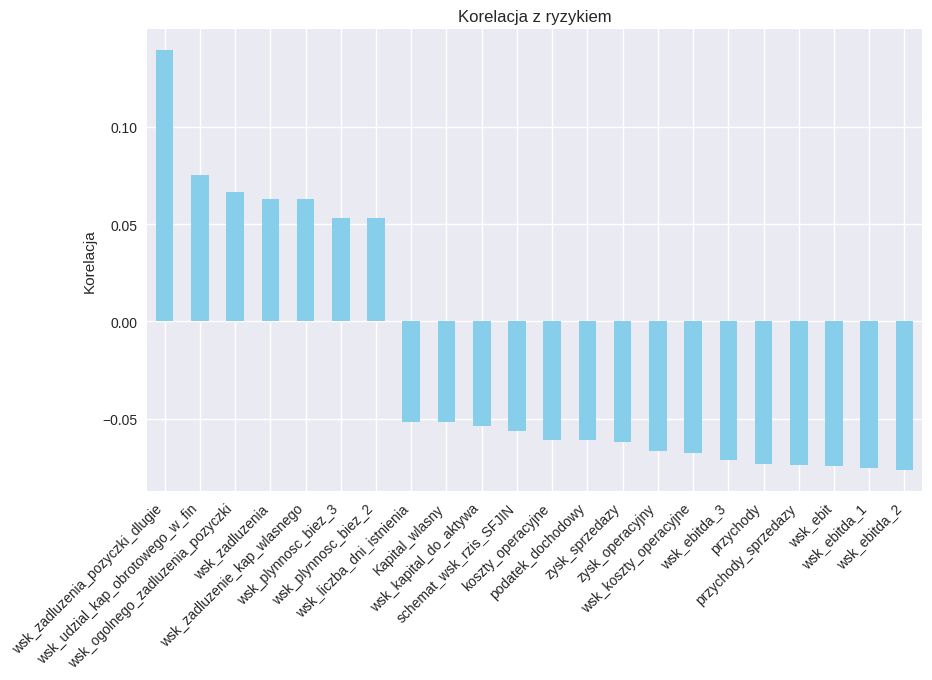

In [44]:
import matplotlib.pyplot as plt

corr = df_train.corr()['default'].drop('default')
corr = corr[abs(corr) > 0.05].sort_values(ascending=False)
print(corr)

if not corr.empty:
    corr.plot(kind='bar', figsize=(10,6), color='skyblue')
    plt.ylabel("Korelacja")
    plt.title("Korelacja z ryzykiem")
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("nie ma cech o takiej korelacji")
